In [60]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

El siguiente dataframe nos muestra datos relevados sobre un número relevante de estadounidenses, y se les consulta acerca de su salud en general y su estado cardíaco en particular. El mismo estaría pensado para identificar posibles patrones (por ejemplo: ¿el índice de masa corporal es un factor de importancia para los infartos?). Es importante aclarar que, en la siguiente muestra, hay individuos que han tenido infartos, como algunos que no. Sobre eso hablaremos en los primeros gráficos.

Algunos de los campos principales son:
HadHeartAttack: nos indica si el individuo tuvo o no un infarto.
Sex: género.
BMI: índice de masa corporal.
GeneralHealth (Fair, Good, etc.): nos indica la salud en general.
Hay muchos más campos, relacionados principalmente con el estilo de vida de los individuos (actividad física, consumo de alcohol, consumo de tabaco, etc.).


*Nota: dado el tamaño del dataset, el mismo fue subido a un repositorio público de GitHub, mediante Git LFS, y compartido con su enlace correspondiente (ubicado en el primer bloque de código)*

In [61]:
data = pd.read_csv("https://media.githubusercontent.com/media/GiselaVillanueva/Taller_II/main/OneDrive/Desktop/Taller_II/heart_2022_no_nans.csv", sep = ",")

*Nota: tomaremos solamente las primeras 100 filas del dataset, para hacerlo procesable (de lo contrario, la última parte, del algoritmo de clasificación, puede tardar horas).*

In [62]:
data = data.head(100)

In [63]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


Hemos elegido el método de feature selection: "selección basada en la varianza". A continuación, lo aplicaremos.

In [64]:
data_r = load_iris()
X = data_r.data
y = data_r.target

In [65]:
print("Shape original:", X.shape)

Shape original: (150, 4)


In [66]:
selector = VarianceThreshold(threshold=0.2)
X_reduced = selector.fit_transform(X)

In [67]:
print("Shape reducido:", X_reduced.shape)


Shape reducido: (150, 3)


In [68]:
var = selector.variances_
print("Varianzas de las características originales:", var)

Varianzas de las características originales: [0.68112222 0.18871289 3.09550267 0.57713289]


In [69]:
selected_feat = selector.get_support(indices=True)
print("Index de las características seleccionadas:", selected_feat)

Index de las características seleccionadas: [0 2 3]


Para continuar con el análisis, hemos elegido un algoritmo de clasificación. Utilizaremos el campo 'HadHeartAttack' que puede tener los valores 'Yes' o 'No' (es decir: ¿Infarto? Si/No).

Convertimos la columna objetivo ('HadHeartAttack') a numérica

In [70]:
data["HadHeartAttack"] = data["HadHeartAttack"].map({'Yes': 1, 'No': 0})

Identificamos las columnas categóricas:

In [71]:
categorical_cols = data.select_dtypes(include=['object']).columns

Convertimos las columnas categóricas a valores dummy:

In [72]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Obtenemos el índice de 'HadHeartAttack'


In [73]:
target_column = 'HadHeartAttack'
target_index = data.columns.get_loc(target_column)

Separamos características y etiquetas usando el índice:

In [74]:
X = data.drop(data.columns[target_index], axis=1)
y = data.iloc[:, target_index]

Normalizamos las características:

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Dividimos los datos en entrenamiento y prueba:

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creamos una lista de clasificadores:

In [77]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC()
}

Entrenamos y evaluamos cada clasificador:

In [78]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.25      0.20      0.22         5

    accuracy                           0.77        30
   macro avg       0.55      0.54      0.54        30
weighted avg       0.75      0.77      0.76        30

[[22  3]
 [ 4  1]]


Results for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.00      0.00      0.00         5

    accuracy                           0.77        30
   macro avg       0.41      0.46      0.43        30
weighted avg       0.68      0.77      0.72        30

[[23  2]
 [ 5  0]]


Results for Decision Tree:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.50      0.20      0.29         5

    accuracy                           0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Realizamos validación cruzada para evaluar la estabilidad del modelo:

In [79]:
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean cross-validation score: {scores.mean()}\n")

Cross-validation scores for Logistic Regression: [0.8  0.9  0.95 0.9  0.75]
Mean cross-validation score: 0.8600000000000001

Cross-validation scores for K-Nearest Neighbors: [0.9  0.9  0.85 0.85 0.8 ]
Mean cross-validation score: 0.86

Cross-validation scores for Decision Tree: [0.95 0.8  0.95 0.85 0.7 ]
Mean cross-validation score: 0.85

Cross-validation scores for Random Forest: [0.9  0.9  0.85 0.85 0.8 ]
Mean cross-validation score: 0.86

Cross-validation scores for Support Vector Machine: [0.9  0.9  0.85 0.85 0.85]
Mean cross-validation score: 0.8699999999999999



En este caso, vemos que hay, en general, mayor "importancia" para HeartAttack = No (o 0, de acuerdo con la transformación que realizamos algunos pasos atrás).
Veamos, por ejemplo, en el primer resultado, "decision tree":

Results for Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.33      0.20      0.25         5

Como podemos ver, el "score" para 0 es mayor, como así también todos los demás valores. Veamos, ahora, qué significan estos resultados:

* En el 85% de los casos, el modelo predijo correctamente Infarto = No.
* El 92% de las veces que el individuo verdaderamente no tuvo un infarto, el modelo predijo correctamente.



A continuación realizaremos un gráfico, a fin de corroborar algunos de los resultados mencionados.

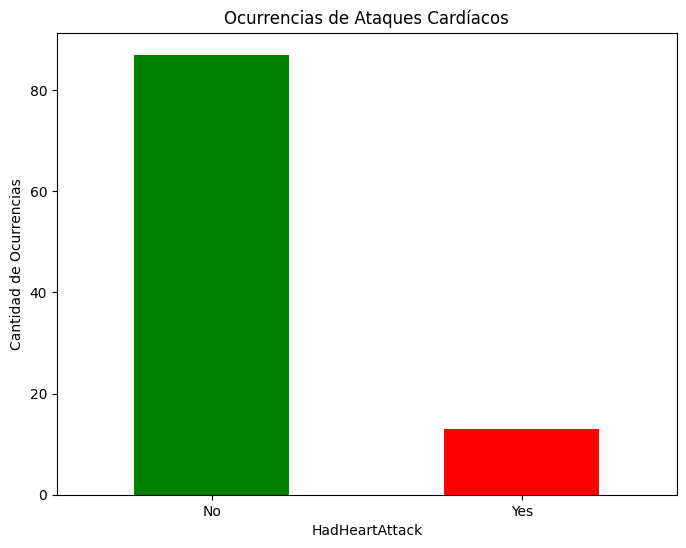

In [80]:
counts = data['HadHeartAttack'].value_counts()

plt.figure(figsize=(8, 6))
ax = counts.plot(kind='bar', color=['green', 'red'])

plt.title('Ocurrencias de Ataques Cardíacos')
plt.xlabel('HadHeartAttack')
plt.ylabel('Cantidad de Ocurrencias')

plt.xticks(range(len(counts)), ['No', 'Yes'], rotation=0)

plt.show()